In [1]:
import numpy as np
import pandas as pd


from astropy.io import fits
from astropy.visualization import make_lupton_rgb
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
hdu_list = fits.open('Rob_candidates.fits')
images = hdu_list[1].data
data = pd.DataFrame(hdu_list[2].data)
hdu_list.close()
data.head()

,COADD_OBJECT_ID,TILENAME,HPIX_16384,HPIX_4096,DNF_ZMEAN_SOF,RA,DEC,FLUX_RADIUS_G,FLUX_RADIUS_R,FLUX_RADIUS_I,...,FWHM_WMEAN_G,FWHM_WMEAN_R,FWHM_WMEAN_I,FWHM_WMEAN_Z,SKYBRITE_WMEAN_G,SKYBRITE_WMEAN_R,SKYBRITE_WMEAN_I,SKYBRITE_WMEAN_Z,NAME,NAME_FOLDER
0,1400263522,DES0336-2915,2354916223,147182263,0.938449,53.898900,-28.912203,3.962615,4.879757,4.983489,...,1.09654,0.943639,0.817035,0.899360,390.652008,947.728027,3299.189941,7099.970215,DES-691022126,DES0336-2915
1,1325853948,DES0242-0041,1163420627,72713789,0.006323,40.969310,-0.619002,10.245866,10.665524,11.179090,...,1.09442,0.956736,0.894366,0.889644,459.313995,1283.849976,3451.110107,8414.360352,DES-701263907,DES0242-0041
2,1087262176,DES0038-4414,2318857161,144928572,0.545765,10.155908,-44.437518,5.865641,5.180269,5.163048,...,1.28928,1.035290,1.025070,0.777657,406.477997,1063.030029,2966.409912,8586.750000,DES-699919273,DES0038-4414


In [3]:
def make_plot_all(objects, data):
    #print(title)
    for i in range(len(objects)):
        if(i%4 == 0):
            plt.figure(figsize=(12,8))
            for j in range(4):
                if(i+j > len(objects)-1): break
                plt.subplot(1,4,j+1)
                new_title = 'COADD_ID: {:.2f}'.format(data['COADD_OBJECT_ID'][i+j])
                plt.title(new_title)
                rgb = make_lupton_rgb(objects[i+j][2], objects[i+j][1], objects[i+j][0], Q=11., stretch=40.)
                plt.imshow(rgb, aspect='equal')
                plt.xticks([], [])
                plt.yticks([], []) 
            plt.show()

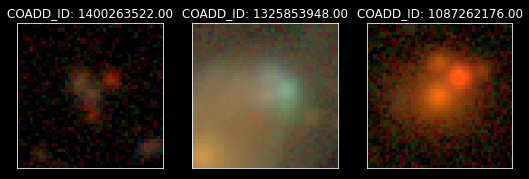

In [4]:
make_plot_all(images, data)